In [ ]:
import random
import csv
import inflect

# Initialize the inflect engine
p = inflect.engine()

def generate_random_math_word_question():
    """
    Generates a random math word problem with a corresponding solution.
    Returns:
        tuple: A tuple containing the question (str) and the answer (str in word format with hyphens).
    """
    templates = [
        "If {num1} apples are added to {num2} apples - how many apples are there in total?",
        "A train travels {num1} miles in the morning and {num2} miles in the evening - What is the total distance traveled?",
        "There are {num1} pencils in one box and {num2} pencils in another box - How many pencils are there altogether?",
        "If a shop sells {num1} toys on Monday and {num2} toys on Tuesday - how many toys were sold in total?",
        "Sam has {num1} marbles and he loses {num2} marbles - How many marbles does Sam have left?",
        "A baker has {num1} muffins and bakes {num2} more muffins - How many muffins does the baker have now?",
        "A store sells {num1} candies and {num2} candies are left - How many candies were sold in total?"
    ]

    template = random.choice(templates)
    num1 = random.randint(1, 20)  # Random number between 1 and 100
    num2 = random.randint(1, 20)  # Random number between 1 and 100

    question = template.format(num1=num1, num2=num2)

    if "added" in question or "altogether" in question or "bakes" in question or "total distance" in question or "How many" in question or "how many" in question:
        answer = num1 + num2
    elif "loses" in question or "left" in question:
        answer = num1 - num2
    else:
        answer = "Logic depends on question wording"  # Placeholder for further complexity

    # Convert the answer to its word format and replace spaces with hyphens
    answer_word = p.number_to_words(answer).replace(" ", "-") if isinstance(answer, int) else answer

    return question, answer_word

def create_csv_with_questions(file_name, num_records):
    """
    Generates a specified number of math word questions and saves them to a CSV file.
    Args:
        file_name (str): Name of the CSV file to save the records.
        num_records (int): Number of math word problems to generate.
    """
    # Open the CSV file in write mode
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header row
        writer.writerow(["Question", "Answer"])
        # Generate and write the records
        for _ in range(num_records):
            question, answer = generate_random_math_word_question()
            writer.writerow([question, answer])
    
    print(f"Successfully created {num_records} records in '{file_name}'.")

# Example: Generate 100 records and save to math_problems.csv
create_csv_with_questions("math_word_problems.csv", 2000)

Successfully created 2000 records in 'test_math_word_problems.csv'.


## Peform sequence length checks

Average Question Length: 18.86 words
Max Question Length: 21 words
Min Question Length: 16 words
Average Answer Length: 1.00 words
Max Answer Length: 1 words
Min Answer Length: 1 words


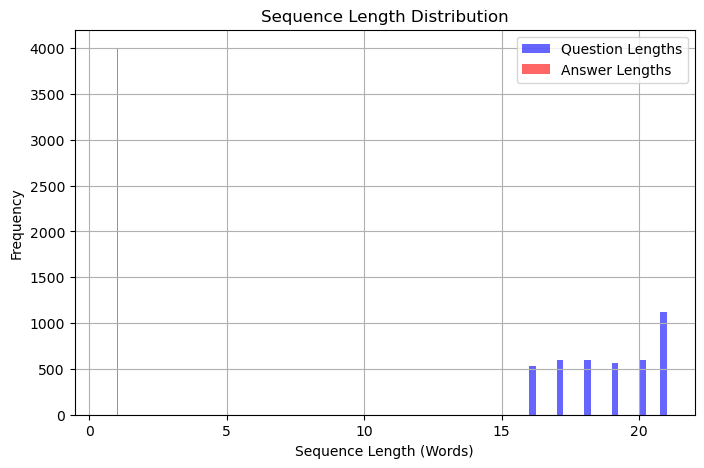

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV
file_name = "math_word_problems.csv"
df = pd.read_csv(file_name)
# Compute sequence lengths
question_lengths = df["Question"].apply(lambda x: len(x.split()))
answer_lengths = df["Answer"].apply(lambda x: len(x.split()))

# Compute basic statistics
print(f"Average Question Length: {question_lengths.mean():.2f} words")
print(f"Max Question Length: {question_lengths.max()} words")
print(f"Min Question Length: {question_lengths.min()} words")
print(f"Average Answer Length: {answer_lengths.mean():.2f} words")
print(f"Max Answer Length: {answer_lengths.max()} words")
print(f"Min Answer Length: {answer_lengths.min()} words")

# Plot histogram of sequence lengths
plt.figure(figsize=(8, 5))
plt.hist(question_lengths, bins=20, alpha=0.6, color='blue', label="Question Lengths")
plt.hist(answer_lengths, bins=20, alpha=0.6, color='red', label="Answer Lengths")
plt.xlabel("Sequence Length (Words)")
plt.ylabel("Frequency")
plt.title("Sequence Length Distribution")
plt.legend()
plt.grid()
# Show the plot
plt.show()

## Perform Bigram (two-word phrase) frequency analysis

Top 20 Most Frequent Bigrams:
- how: 3442
how many: 3442
in total?: 1688
pencils in: 1186
were sold: 1154
sold in: 1154
are there: 1127
miles in: 1116
in the: 1116
toys on: 1116
apples are: 1068
total? a: 694
sam has: 602
marbles and: 602
and he: 602
he loses: 602
marbles -: 602
many marbles: 602
marbles does: 602
does sam: 602


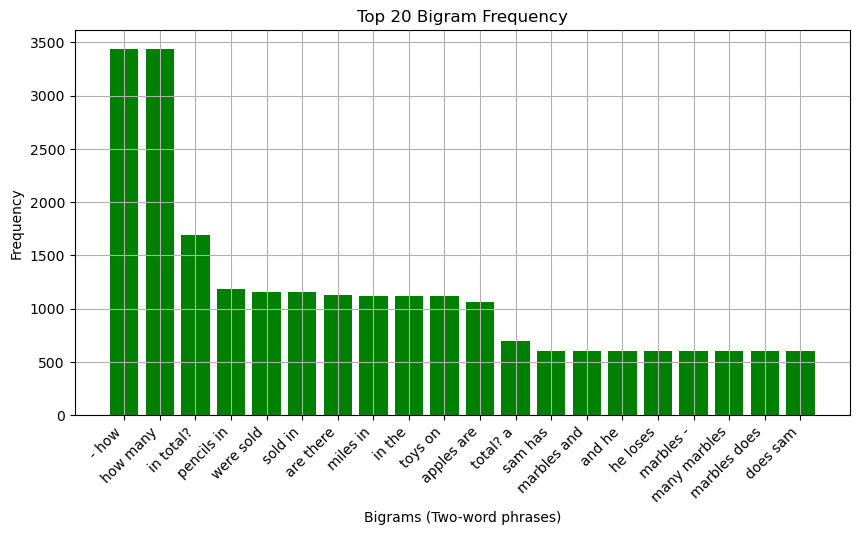

In [ ]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
from itertools import islice

# Load the dataset from CSV
file_name = "math_word_problems.csv"
df = pd.read_csv(file_name)
# Tokenize questions and answers by splitting into words
tokens = []
for text in df["Question"].tolist() + df["Answer"].tolist():
    tokens.extend(text.lower().split())  # Convert to lowercase for uniformity

# Generate bigram pairs (two consecutive words)
bigrams = [" ".join(pair) for pair in zip(tokens, islice(tokens, 1, None))]
# Compute frequency of each bigram
bigram_counts = collections.Counter(bigrams)
# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)  # Top 20 bigrams
# Print the most frequent bigrams
print("Top 20 Most Frequent Bigrams:")
for bigram, count in most_common_bigrams:
    print(f"{bigram}: {count}")

# Visualize bigram frequency distribution
plt.figure(figsize=(10, 5))
plt.bar([bigram for bigram, _ in most_common_bigrams], [count for _, count in most_common_bigrams], color="green")
plt.xlabel("Bigrams (Two-word phrases)")
plt.ylabel("Frequency")
plt.title("Top 20 Bigram Frequency")
plt.xticks(rotation=45, ha="right")
plt.grid()
# Show the plot
plt.show()